In [1]:
#conda install -c conda-forge keras
# example of training a final classification model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import pickle

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn')

Using TensorFlow backend.


In [2]:
path = '../Entrenamientos/Procesado_Tramos.xlsx'
df = pd.read_excel(path)
df = df[df["porc"]!=np.inf]
df["puntos_en_tramo"]= df["tramo_final"]-df["tramo_inicial"]
df = df[df["puntos_en_tramo"]>9]

#Ya tenemos el dataframe filtrado

### Para hacer train-test tradicional

df2 = df[["pwr","porc","viento_aparente","spd"]]
dataset = df2.values

X = dataset[:,0:3]
Y = dataset[:,3]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

### Para hacer train con todo menos la competi y test la competi

In [3]:
df_train = df[df['prueba']!='20180429_LEMG_195_90_R_C.gpx']
df_test = df[df['prueba']=='20180429_LEMG_195_90_R_C.gpx']
#20180429_LEMG_195_90_R_C.gpx

In [4]:
df_train.prueba.unique()

array(['20180225_LEVS_195_90_R_E.gpx', '20180316_LEVS_195_90_R_E.gpx',
       '20180318_LEVS_195_90_R_E.gpx', '20180322_LEVS_195_90_R_E.gpx',
       '20180329_LEVD_195_90_R_E.gpx', '20180406_LEVS_195_90_R_E.gpx',
       '20180415_LEVS_195_90_R_E.gpx', '20180422_LEVS_195_90_R_E.gpx'], dtype=object)

In [5]:
df_test.prueba.unique()

array(['20180429_LEMG_195_90_R_C.gpx'], dtype=object)

In [6]:
df_test

,tramo,tramo_inicial,tramo_final,pwr,time_seg,dist,spd,viento_aparente,porc,dist_acum,prueba,puntos_en_tramo
0,0,0,16,196.808012,17,187.416640,39.688230,14.918299,-0.399565,173.532309,20180429_LEMG_195_90_R_C.gpx,16
1,1,16,75,230.996299,98,886.583360,32.568368,14.577416,0.523132,1055.000000,20180429_LEMG_195_90_R_C.gpx,59
2,2,75,122,194.043315,60,616.400000,36.984000,14.550887,-0.240187,1677.304307,20180429_LEMG_195_90_R_C.gpx,47
3,3,122,227,221.693546,193,1692.600000,31.571813,14.552940,0.895103,3364.000000,20180429_LEMG_195_90_R_C.gpx,105
4,4,227,273,169.324586,47,538.400000,41.239149,14.433466,-1.235191,3911.000000,20180429_LEMG_195_90_R_C.gpx,46
7,7,279,316,234.060122,71,640.884022,32.495528,14.370793,0.728433,4604.000000,20180429_LEMG_195_90_R_C.gpx,37
9,9,324,414,249.069463,231,1170.000000,18.233766,14.525184,3.473797,5912.000000,20180429_LEMG_195_90_R_C.gpx,90
10,10,414,428,179.856611,19,207.800000,39.372632,14.719222,-0.431682,6123.411765,20180429_LEMG_195_90_R_C.gpx,14
11,11,428,468,235.760201,53,470.282690,31.943730,10.532097,1.079278,6599.400000,20180429_LEMG_195_90_R_C.gpx,40
13,13,470,873,253.888290,1158,4888.000000,15.195855,10.866274,5.119734,11502.000000,20180429_LEMG_195_90_R_C.gpx,403


In [7]:
X_train = df_train[["pwr","porc","viento_aparente"]] 
X_test = df_test[["pwr","porc","viento_aparente"]]
Y_train = df_train[["spd"]]
Y_test = df_test[["spd"]]

In [8]:
#standarScaler

#scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
#scalarX, scalarY = StandardScaler(), StandardScaler()
scalarX = RobustScaler()

X_train_rs = scalarX.fit_transform(X_train)
#scalarY.fit(Y.reshape(len(Y),1))
X_test_rs = scalarX.transform(X_test)

In [9]:
#Probar por diferentes funciones de activacion y con regularizacion

# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=3, activation='relu'))

model.add(Dense(60, activation='relu'))

model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train_rs, Y_train, epochs=1000, verbose=0)

In [10]:
# make a prediction
Y_pred = model.predict(X_test_rs)
# show the inputs and predicted outputs
for i in range(len(X_test_rs)):
        print("X=%s, Predicted=%s" % (X_test_rs[i], Y_pred[i]))


X=[ 0.26078364 -0.07951276  0.66969699], Predicted=[ 37.06528091]
X=[ 0.63424248  0.26600222  0.65440587], Predicted=[ 34.57713699]
X=[ 0.23058322 -0.01983196  0.65321587], Predicted=[ 36.24053574]
X=[ 0.53262301  0.40529155  0.65330798], Predicted=[ 32.65762711]
X=[-0.03943405 -0.39242325  0.64794866], Predicted=[ 39.21155167]
X=[ 0.66771042  0.34287973  0.6451373 ], Predicted=[ 33.805439]
X=[ 0.83166631  1.37091494  0.65206291], Predicted=[ 18.9672966]
X=[ 0.07561348 -0.09153959  0.66076692], Predicted=[ 36.48283005]
X=[ 0.68628139  0.47425812  0.47294353], Predicted=[ 31.74231529]
X=[ 0.88430521  1.98725638  0.48793384], Predicted=[ 13.65870857]
X=[-0.76770975 -1.321611   -0.07838373], Predicted=[ 42.88113403]
X=[ 0.67167078  0.35120817  0.07421937], Predicted=[ 31.27636337]
X=[-0.24887153 -0.98928576  0.05470359], Predicted=[ 41.45222092]
X=[ 0.55192658  0.8523154   0.27416294], Predicted=[ 25.07766914]
X=[ 0.92687967  2.708902   -0.02039736], Predicted=[ 15.27868176]
X=[-0.2747618

In [13]:
X_test

,pwr,porc,viento_aparente
0,196.808012,-0.399565,14.918299
1,230.996299,0.523132,14.577416
2,194.043315,-0.240187,14.550887
3,221.693546,0.895103,14.552940
4,169.324586,-1.235191,14.433466
7,234.060122,0.728433,14.370793
9,249.069463,3.473797,14.525184
10,179.856611,-0.431682,14.719222
11,235.760201,1.079278,10.532097
13,253.888290,5.119734,10.866274


In [14]:
test_val = pd.DataFrame(X_test)
test_val.columns = (["pwr","porc","viento_aparente"])
test_val["spd"] = Y_test
test_val["Y_pred"] = Y_pred
test_val["diff"] = test_val["spd"]-test_val["Y_pred"]
test_val.head()

,pwr,porc,viento_aparente,spd,Y_pred,diff
0,196.808012,-0.399565,14.918299,39.688230,36.036156,3.652074
1,230.996299,0.523132,14.577416,32.568368,33.751232,-1.182864
2,194.043315,-0.240187,14.550887,36.984000,35.190109,1.793891
3,221.693546,0.895103,14.552940,31.571813,31.686165,-0.114351
4,169.324586,-1.235191,14.433466,41.239149,38.229713,3.009435


(array([  6.,  15.,  24.,  11.,  10.,   6.,   6.,   0.,   1.,   1.]),
 array([ -6.09481606,  -3.65731129,  -1.21980653,   1.21769823,
          3.65520299,   6.09270775,   8.53021252,  10.96771728,
         13.40522204,  15.8427268 ,  18.28023156]),
 <a list of 10 Patch objects>)

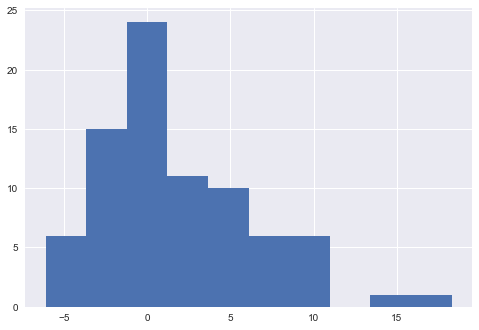

In [15]:
plt.hist(test_val['diff'])

In [17]:
print("Predicciones:")
print(test_val["Y_pred"].mean())
print(test_val["Y_pred"].max())
print(test_val["Y_pred"].min())

print("Diferencias:")
print(test_val["diff"].mean())
print(test_val["diff"].max())
print(test_val["diff"].min())

Predicciones:
31.789865493774414
54.8295
14.8388
Diferencias:
1.829567159129527
18.2802315647
-6.09481605707


In [20]:
test_val['dist'] = df_test['dist']


In [24]:
test_val['dist'] = df_test['dist']
test_val['time_seg'] = df_test['time_seg']
test_val['time_seg_pred'] = test_val['dist']/(test_val['Y_pred']/3.6)

In [28]:
import datetime

In [39]:
tiempo_real = test_val['time_seg'].sum()
tiempo_pred = test_val['time_seg_pred'].sum()
print('Tiempo Real: %s' %str(datetime.timedelta(seconds=tiempo_real)))
print('Tiempo Predicho: %s' %str(datetime.timedelta(seconds=tiempo_pred)))

Tiempo Real: 3:08:33
Tiempo Predicho: 3:09:07.265174


In [41]:
test_val

,pwr,porc,viento_aparente,spd,Y_pred,diff,dist,time_seg,time_seg_pred
0,196.808012,-0.399565,14.918299,39.688230,36.036156,3.652074,187.416640,17,18.722860
1,230.996299,0.523132,14.577416,32.568368,33.751232,-1.182864,886.583360,98,94.565438
2,194.043315,-0.240187,14.550887,36.984000,35.190109,1.793891,616.400000,60,63.058629
3,221.693546,0.895103,14.552940,31.571813,31.686165,-0.114351,1692.600000,193,192.303476
4,169.324586,-1.235191,14.433466,41.239149,38.229713,3.009435,538.400000,47,50.699831
7,234.060122,0.728433,14.370793,32.495528,33.008228,-0.512700,640.884022,71,69.897187
9,249.069463,3.473797,14.525184,18.233766,21.185259,-2.951493,1170.000000,231,198.817487
10,179.856611,-0.431682,14.719222,39.372632,35.316822,4.055810,207.800000,19,21.181974
11,235.760201,1.079278,10.532097,31.943730,31.317862,0.625868,470.282690,53,54.059169
13,253.888290,5.119734,10.866274,15.195855,14.838839,0.357016,4888.000000,1158,1185.861003


In [25]:
test_val[(test_val["diff"]>8) | (test_val["diff"]<-10)]

,pwr,porc,viento_aparente,spd,Y_pred,diff,dist,time_seg,time_seg_pred
20,147.781503,-2.787657,6.121024,50.783366,42.371941,8.411425,3978.030303,282,337.980937
22,43.281740,-4.173012,14.445208,61.576779,43.296547,18.280232,3249.885532,190,270.219870
25,245.479461,1.437892,14.238703,40.524726,30.515394,10.009332,630.384632,56,74.368517
26,172.756128,-1.364789,14.295410,48.304318,38.949604,9.354714,684.311177,51,63.248913
41,209.982609,0.511746,-11.610435,38.214585,29.193323,9.021262,329.070042,31,40.579556
46,29.602529,-6.597866,14.398382,69.830249,54.829506,15.000743,2754.415368,142,180.849610
56,79.446017,-4.068272,14.193814,55.784874,46.046276,9.738598,1580.571429,102,123.572580
76,98.781851,-3.050762,-14.134608,47.753510,37.800320,9.953190,848.951282,64,80.851820
92,37.767373,-5.245116,-6.017731,55.405954,45.137234,10.268721,8788.000000,571,700.902459


In [11]:
pickle.dump(scalarX, open("Scaler.model", 'wb'))


model.save("TF_Tramos_2.model")
#Para cargar el modelo
#https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model